Output()

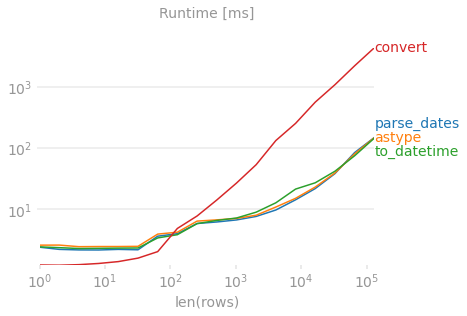

In [1]:
import pandas as pd
import numpy as np
import perfplot
from datetime import datetime

to_datetime = lambda d: datetime.strptime(d, '%Y-%m-%d')

test_file = 'datatypes_test_file.csv'

def _setup(n):
    
    dft = pd.DataFrame(
        {
            "A": np.random.rand(n),
            "B": pd.Timestamp("20010102"),
            "C": pd.Timestamp("20010102"),
        }
    )

    dft.to_csv(test_file, index=False)

def _parse_dates():
    pd.read_csv(test_file, parse_dates=['B','C'], infer_datetime_format=True, cache_dates=True)

def _convert():
    pd.read_csv(test_file, converters={'B': to_datetime, 'C': to_datetime})

def _astype():
    df = pd.read_csv(test_file)
    df['B'] = df['B'].astype('datetime64[ns]')
    df['C'] = df['C'].astype('datetime64[ns]')

def _to_datetime():
    df = pd.read_csv(test_file)
    df['B'] = pd.to_datetime(df['B'], format='%Y-%m-%d')
    df['C'] = pd.to_datetime(df['B'], format='%Y-%m-%d')

perfplot.show(
    setup=_setup,
    kernels=[
        lambda a: _parse_dates(),
        lambda a: _astype(),
        lambda a: _to_datetime(),
        lambda a: _convert(),
        
    ],
    labels=["parse_dates", "astype", "to_datetime", 'convert'],
    n_range=[2 ** k for k in range(18)],
    xlabel="len(rows)",
    equality_check=None,
    time_unit="ms",
)